# Task 1 - INM702 Coursework

## Content:
- **[Part 1](#part1)- Heuristic approach**
- [Part 1.1](#part1.1)- Visualisation of heuristic approach
- **[Part 2](#part2)- Djikstra algorithm implementation on heuristic approach**
- [Part 2.1](#part2.1)- Visualisation of implementation of Djikstra algorithm

[Back to top](#Content:)


<a id='part1'></a>
## Heuristic algorithm

In [1]:
#Build a method to build and visualize the grid filled with random numbers.
import random
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [2]:
HEIGHT = int(input("Insert amount of rows in the grid "))
WIDTH = int(input("Insert amount of columns in the grid "))

Insert amount of rows in the grid 50
Insert amount of columns in the grid 50


In [3]:
ARRAY = np.random.randint(0,9, (HEIGHT, WIDTH))
print(ARRAY)

[[0 3 5 ... 1 0 2]
 [1 1 1 ... 6 7 8]
 [7 4 6 ... 1 7 2]
 ...
 [5 2 3 ... 5 2 4]
 [3 0 1 ... 5 2 1]
 [1 4 2 ... 0 4 5]]


In [4]:
#finding neihbour in the grid for each cell
#agent moves from cell to cell (u,d,l,r)
def f_neighbours(array, i, j):
    neighbours_k = []
    neighbours_v = []
    while True:
        if i >= HEIGHT or j >= WIDTH:
            False
            
        #neighbors search goes cloclwise:
        elif i == 0 or i == (HEIGHT-1) or j == 0 or j == (WIDTH - 1):    # corners and sides
            
            if i != 0:
                neighbours_k.append(array[i - 1, j])
                neighbours_v.append((i - 1,j)) # u
                
            if j != (WIDTH - 1):             
                neighbours_k.append(array[i, j+1])
                neighbours_v.append((i, j+1))#r
                
            if i != (HEIGHT-1):
                neighbours_k.append(array[i+1,j])
                neighbours_v.append((i+1, j))#d
                                    
#             if j != 0:                  
#                 neighbours_k.append(array[i, j-1]) # l
#                 neighbours_v.append((i,j - 1)) 
                

        elif i < HEIGHT and j < WIDTH:
            neighbours_k = [array[i - 1, j], array[i, j + 1], array[i + 1, j]]  #, array[i, j - 1]]
            neighbours_v = [(i - 1,j), (i,j + 1), (i + 1,j)] #(i,j - 1)
        return neighbours_k, neighbours_v


# neighbours = f_neighbours(array=ARRAY, i=2,j=1)
# # neighbours = neighbours(ARRAY, 0, 0)
# print(neighbours)
# type(neighbours)
# ks= neighbours[0]
# vs = neighbours[1]
# print(ks)
# print(vs)

In [5]:
# ks = [1, 3, 0, 3]

def f_cell (ks):
    min_val=min(ks)
    return min_val
        
# a = f_min(ks)
# print(a)


In [6]:
def f_location (ks, a):
    location = ks.index(a)
    return location

In [7]:
# find the row i position
def first(vs, idex_pos):
    location = vs[idex_pos]
#     print(location)
    i = location[0]
    return i


# i = first(neighbours, cell)
# print(i)
# print(type(i))

In [8]:
# find the column j position
def second (vs, idex_pos):
    location = vs[idex_pos]
    j = location[1]
    return j

# j = second(neighbours, cell)
# print(j)
# print(type(j))END = ARRAY[HEIGHT - 1, WIDTH - 1]

In [9]:
# test game
game_is_on = True

score = []

next_cell = ARRAY[0, 0]
score.append(next_cell)
neighbours = {next_cell: (0, 0)}

prev_cell = ARRAY[0, 0]
prev_l = [(0, 0)]

i=0
j=0

In [10]:
while game_is_on:

    neighbours = f_neighbours(ARRAY, i, j) #finds all neighbours
    ks= neighbours[0]
    vs = neighbours[1]
   
#     print(ks)
#     print(vs)
    if (HEIGHT-1, WIDTH-1) in vs:
        next_cell = ARRAY[HEIGHT-1, WIDTH-1]
        game_is_on = False
    
    else:
        next_cell = f_cell(ks) #finding the minimum value cell
        index_pos = f_location(ks, next_cell)
    
    #if the smallest one  - the previous one, chose the other smallest
    if vs[index_pos] in prev_l:
        ks.remove(next_cell)
        del(vs[index_pos])
        next_cell = f_cell(ks)
        index_pos = f_location(ks, next_cell)


    score.append(next_cell)

    prev_cell=next_cell
    prev_l.append(vs[index_pos])

    i = first(vs, index_pos)
    j = second(vs, index_pos)
    
    #if next_cell is our destination cell then the program stops
    if vs[index_pos] == (HEIGHT-1, WIDTH-1):
        game_is_on = False
        
# print(score)
# len(score)

In [11]:
total = sum(score)  #sum of the list with weight of each step
print (f"End of the game. Your final score is {total}")

End of the game. Your final score is 389


In [12]:
print(prev_l)
len(prev_l)

[(0, 0), (1, 0), (1, 1), (1, 2), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 7), (2, 7), (2, 8), (2, 9), (1, 9), (1, 10), (0, 10), (0, 11), (1, 11), (2, 11), (2, 12), (3, 12), (4, 12), (4, 13), (4, 14), (5, 14), (6, 14), (6, 15), (5, 15), (4, 15), (3, 15), (3, 16), (3, 17), (4, 17), (4, 18), (3, 18), (2, 18), (1, 18), (0, 18), (0, 19), (1, 19), (1, 20), (0, 20), (0, 21), (0, 22), (1, 22), (1, 23), (2, 23), (2, 24), (2, 25), (2, 26), (2, 27), (1, 27), (1, 28), (0, 28), (0, 29), (0, 30), (0, 31), (1, 31), (1, 32), (1, 33), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (1, 37), (2, 37), (3, 37), (4, 37), (5, 37), (6, 37), (6, 38), (5, 38), (5, 39), (5, 40), (5, 41), (5, 42), (6, 42), (6, 43), (5, 43), (5, 44), (5, 45), (6, 45), (6, 46), (6, 47), (7, 47), (7, 48), (8, 48), (8, 49), (9, 49), (10, 49), (11, 49), (12, 49), (13, 49), (14, 49), (15, 49), (16, 49), (17, 49), (18, 49), (19, 49), (20, 49), (21, 49), (22, 49), (23, 49), (24, 49), (25, 49), (26, 49), (27, 49), (28, 49), (29, 

131

[Back to top](#Content:)


<a id='part1.1'></a>
## Visualisation of heuristic approach

In [13]:
path = [list(x) for x in prev_l]
# type(path)

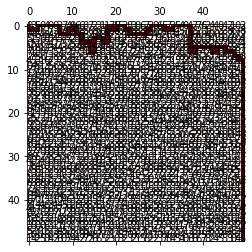

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

colored_path = np.zeros((HEIGHT,WIDTH), dtype=int)

for list in path:
    r= list[0]
    c = list[1]
    colored_path[r,c] = 1
# print(colored_path)


min_val, max_val = 0, HEIGHT
for i in range(max_val):
    for j in range(max_val):
      c = ARRAY[j,i]
      ax.text(i, j, str(c), va='center', ha='center')

cax = ax.matshow(colored_path, cmap = plt.cm.Reds)
plt.show()

[Back to top](#Content:)


<a id='part2'></a>
## Djikstra algorithm implementation on heuristic approach
Implementation of heuristic approach for Gjikstra algorithm to find the shortest path

In [2]:
HEIGHT = int(input("Insert amount of rows in the grid "))
WIDTH = int(input("Insert amount of columns in the grid "))

Insert amount of rows in the grid 20
Insert amount of columns in the grid 20


In [3]:
ARRAY = np.random.randint(0,9, (HEIGHT, WIDTH))
print(ARRAY)

[[7 1 8 1 2 4 3 8 1 4 5 5 7 7 7 5 7 0 1 6]
 [5 2 2 2 8 6 7 8 8 7 3 3 1 0 5 6 5 4 1 6]
 [6 3 3 6 6 0 8 8 2 5 1 3 6 0 7 8 7 3 7 3]
 [5 4 3 7 1 4 0 2 7 2 8 3 2 4 5 4 7 4 2 0]
 [3 8 0 8 0 4 4 5 6 3 1 7 4 0 4 6 1 1 5 4]
 [7 0 4 4 3 6 5 2 2 0 2 6 0 0 6 7 2 4 7 3]
 [8 6 8 1 0 3 4 8 8 6 4 4 1 0 1 6 0 7 5 7]
 [6 4 0 4 7 4 1 1 8 6 6 2 3 2 4 4 0 8 5 5]
 [2 3 6 6 0 7 6 7 7 7 7 7 2 2 4 8 7 5 2 0]
 [3 3 5 3 1 3 4 6 0 1 6 2 4 0 2 2 3 2 2 1]
 [2 4 3 8 7 3 1 8 4 2 8 8 8 1 7 2 8 4 1 6]
 [3 0 3 2 7 4 2 3 2 0 4 6 6 4 0 7 7 1 0 4]
 [2 5 3 0 4 5 6 2 0 0 6 2 6 0 3 0 0 7 3 4]
 [8 1 2 3 0 8 8 5 8 6 0 7 4 8 2 3 5 3 7 7]
 [7 4 3 0 2 3 8 2 6 6 0 2 4 3 6 1 6 1 3 3]
 [1 3 5 7 5 2 0 3 5 3 0 1 5 1 3 7 1 3 2 1]
 [5 2 4 7 6 3 2 8 8 1 4 2 6 2 0 0 2 8 4 1]
 [2 2 1 5 3 7 4 3 3 3 2 4 2 1 7 0 8 5 0 7]
 [5 0 2 6 5 8 0 1 4 6 8 6 0 4 8 4 3 2 3 4]
 [7 3 0 5 7 5 0 7 6 2 7 8 4 6 5 1 5 1 5 1]]


In [4]:
#finding neihbour in the grid for each cell
#agent moves from cell to cell (u,d,l,r)
def f_neighbours(array, i, j):
    neighbours_k = []
    neighbours_v = []
    while True:
        if i >= HEIGHT or j >= WIDTH:
            False
            
        #neighbors search goes cloclwise:
        elif i == 0 or i == (HEIGHT-1) or j == 0 or j == (WIDTH - 1):    # corners and sides
            
            if i != 0:
                neighbours_k.append(array[i - 1, j])
                neighbours_v.append((i - 1,j)) # u
                
            if j != (WIDTH - 1):             
                neighbours_k.append(array[i, j+1])
                neighbours_v.append((i, j+1))#r
                
            if i != (HEIGHT-1):
                neighbours_k.append(array[i+1,j])
                neighbours_v.append((i+1, j))#d
                                    
            if j != 0:                  
                neighbours_k.append(array[i, j-1]) # l
                neighbours_v.append((i,j - 1)) 
                

        elif i < HEIGHT and j < WIDTH:
            neighbours_k = [array[i - 1, j], array[i, j + 1], array[i + 1, j], array[i, j - 1]]
            neighbours_v = [(i - 1,j), (i,j + 1), (i + 1,j), (i,j - 1)]
        return neighbours_k, neighbours_v


# neighbours = f_neighbours(array=ARRAY, i=2,j=1)
# # neighbours = neighbours(ARRAY, 0, 0)
# print(neighbours)
# type(neighbours)
# ks= neighbours[0]
# vs = neighbours[1]
# print(ks)
# print(vs)

In [5]:
# ks = [1, 3, 0, 3]

def f_cell (ks):
    min_val=min(ks)
    return min_val
        
# a = f_min(ks)
# print(a)


In [6]:
#finds key value index in the list "ks", so that that index position can be used to get the (i,j) location in the "vs" list
def f_location (ks, a):
    location = ks.index(a)
    return location

In [7]:
# find the row i position
def first(vs, idex_pos):
    location = vs[idex_pos]
#     print(location)
    i = location[0]
    return i


# i = first(neighbours, cell)
# print(i)
# print(type(i))

In [8]:
# find the column j position
def second (vs, idex_pos):
    location = vs[idex_pos]
    j = location[1]
    return j

# j = second(neighbours, cell)
# print(j)
# print(type(j))END = ARRAY[HEIGHT - 1, WIDTH - 1]

In [9]:
# test game
game_is_on = True

score = []

next_cell = ARRAY[0, 0]
score.append(next_cell)
neighbours = {next_cell: (0, 0)}

prev_cell = ARRAY[0, 0]
prev_l = [(0, 0)]

i=0
j=0

In [10]:
while game_is_on:

    neighbours = f_neighbours(ARRAY, i, j) #finds all neighbours
    ks= neighbours[0] #key values - the "weight"
    vs = neighbours[1] # values - the location(i,j)
   
#     print(ks)
#     print(vs)
    #if next_cell is our destination cell then the program stops
    if (HEIGHT-1, WIDTH-1) in vs:
        next_cell = ARRAY[HEIGHT-1, WIDTH-1]
        score.append(next_cell)
        index_pos = f_location(ks, next_cell)
        prev_l.append(vs[index_pos])
        game_is_on = False
        
    else:
        next_cell = f_cell(ks) #finding the minimum value cell
        index_pos = f_location(ks, next_cell)
        
        


#         for _ in itertools.repeat(None, (len(neighbours))):
#         for _ in range (len(neighbours)): # number of neighbours need to be tested for the "visited" status
        #if the smallest one  - the previous one, chose the other smallest
        if vs[index_pos] in prev_l:
            ks.remove(next_cell)
            del(vs[index_pos])
            next_cell = f_cell(ks)
            index_pos = f_location(ks, next_cell)

                       
        if vs[index_pos] in prev_l:
            ks.remove(next_cell)
            del(vs[index_pos])
            next_cell = f_cell(ks)
            index_pos = f_location(ks, next_cell)
            
            
        if vs[index_pos] in prev_l:
            ks.remove(next_cell)
            del(vs[index_pos])
            next_cell = f_cell(ks)
            index_pos = f_location(ks, next_cell)

            
        #if the smallest one - (width-1, , chosee the other one
        if (vs[index_pos][0] == 0 and vs[index_pos][1] == j-1) or (vs[index_pos][0] == (WIDTH-1) and vs[index_pos][1] == j-1) or (vs[index_pos][0] == (i-1) and vs[index_pos][1] == HEIGHT-1) or (vs[index_pos][0] == (i-1) and vs[index_pos][1] == 0):
            ks.remove(next_cell)
            del(vs[index_pos])
            next_cell = f_cell(ks)
            index_pos = f_location(ks, next_cell)
        

        score.append(next_cell)

        prev_cell=next_cell
        prev_l.append(vs[index_pos])

        i = first(vs, index_pos)
        j = second(vs, index_pos)
        print(score)

#         if vs[index_pos] == (HEIGHT-1, WIDTH-1):
#             game_is_on = False

# print(score)
# len(score)

[7, 1]
[7, 1, 2]
[7, 1, 2, 2]
[7, 1, 2, 2, 2]
[7, 1, 2, 2, 2, 1]
[7, 1, 2, 2, 2, 1, 2]
[7, 1, 2, 2, 2, 1, 2, 4]
[7, 1, 2, 2, 2, 1, 2, 4, 3]
[7, 1, 2, 2, 2, 1, 2, 4, 3, 7]
[7, 1, 2, 2, 2, 1, 2, 4, 3, 7, 6]
[7, 1, 2, 2, 2, 1, 2, 4, 3, 7, 6, 0]
[7, 1, 2, 2, 2, 1, 2, 4, 3, 7, 6, 0, 4]
[7, 1, 2, 2, 2, 1, 2, 4, 3, 7, 6, 0, 4, 0]
[7, 1, 2, 2, 2, 1, 2, 4, 3, 7, 6, 0, 4, 0, 2]
[7, 1, 2, 2, 2, 1, 2, 4, 3, 7, 6, 0, 4, 0, 2, 5]
[7, 1, 2, 2, 2, 1, 2, 4, 3, 7, 6, 0, 4, 0, 2, 5, 2]
[7, 1, 2, 2, 2, 1, 2, 4, 3, 7, 6, 0, 4, 0, 2, 5, 2, 2]
[7, 1, 2, 2, 2, 1, 2, 4, 3, 7, 6, 0, 4, 0, 2, 5, 2, 2, 0]
[7, 1, 2, 2, 2, 1, 2, 4, 3, 7, 6, 0, 4, 0, 2, 5, 2, 2, 0, 2]
[7, 1, 2, 2, 2, 1, 2, 4, 3, 7, 6, 0, 4, 0, 2, 5, 2, 2, 0, 2, 1]
[7, 1, 2, 2, 2, 1, 2, 4, 3, 7, 6, 0, 4, 0, 2, 5, 2, 2, 0, 2, 1, 3]
[7, 1, 2, 2, 2, 1, 2, 4, 3, 7, 6, 0, 4, 0, 2, 5, 2, 2, 0, 2, 1, 3, 2]
[7, 1, 2, 2, 2, 1, 2, 4, 3, 7, 6, 0, 4, 0, 2, 5, 2, 2, 0, 2, 1, 3, 2, 5]
[7, 1, 2, 2, 2, 1, 2, 4, 3, 7, 6, 0, 4, 0, 2, 5, 2, 2, 0, 2, 1, 3, 2, 5, 1]
[7, 

In [11]:
total_mode1 = sum(score)  #sum of the list with weight of each step
print(score)
print (f"End of the game. Your final score for mode 1 is {total_mode1}")

[7, 1, 2, 2, 2, 1, 2, 4, 3, 7, 6, 0, 4, 0, 2, 5, 2, 2, 0, 2, 1, 3, 2, 5, 1, 3, 3, 1, 0, 0, 4, 0, 0, 0, 1, 4, 2, 2, 0, 1, 4, 0, 3, 0, 0, 5, 3, 1, 3, 2, 1, 1, 4, 0, 3, 2, 1, 5, 1]
End of the game. Your final score for mode 1 is 126


In [12]:
total_mode2 = 0  #sum of the list with weight of each step
for i in range(len(score)-1):
    n = abs((score[i+1])-score[i])
    score[i]=0
    total_mode2 += n
    score[i+1]=total_mode2
#     print(total_mode2)
#     print(score)
print (f"End of the game. Your final score for mode 2 is {total_mode2}")

End of the game. Your final score for mode 2 is 19141937


C:\Users\LENOVO\AppData\Local\Temp/ipykernel_6304/3066375436.py:5: RuntimeWarning: overflow encountered in long_scalars
  total_mode2 += n


[Back to top](#Content:)


<a id='part2.1'></a>
## Visualisation of implementation of Djikstra algorithm

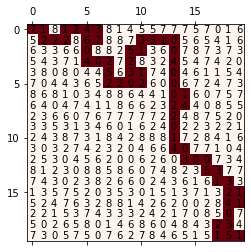

In [13]:
# path = [list(x) for x in prev_l]
# type(path)
fig = plt.figure()
ax = fig.add_subplot(111)

colored_path = np.zeros((HEIGHT,WIDTH), dtype=int)

for list in prev_l:
    r= list[0]
    c = list[1]
    colored_path[r,c] = 1
# print(colored_path)


min_val, max_val = 0, HEIGHT
for i in range(max_val):
    for j in range(max_val):
      c = ARRAY[j,i]
      ax.text(i, j, str(c), va='center', ha='center')

cax = ax.matshow(colored_path, cmap = plt.cm.Reds)
plt.show()